In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)


apt_data = pd.read_csv('apartments_pl_2023.csv')
apt_data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,0.105,1.652,NaN,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [81]:
apt_data.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,18905.000000,18905.000000,15467.000000,18643.000000,15634.000000,18905.000000,18905.000000,18905.000000,18905.000000,18891.000000,18817.000000,18880.000000,18892.000000,18847.000000,18340.000000,18878.000000,1.890500e+04
mean,58.509976,2.676752,3.339820,5.279783,1984.551043,52.020411,19.516394,4.398444,20.099656,0.414897,1.002196,0.518748,0.371033,0.356646,1.460047,0.364134,6.925592e+05
std,21.060168,0.903619,2.549141,3.333666,33.767929,1.353998,1.769053,2.857387,23.513874,0.472782,0.913721,0.506783,0.452338,0.475884,1.102847,0.469334,3.443890e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.979110,14.447127,0.020000,0.000000,0.004000,0.005000,0.001000,0.004000,0.001000,0.006000,0.003000,1.500000e+05
25%,44.200000,2.000000,2.000000,3.000000,1967.000000,51.109100,18.536220,2.070000,7.000000,0.175000,0.367000,0.237000,0.158000,0.118500,0.592000,0.145000,4.588000e+05
50%,54.400000,3.000000,3.000000,4.000000,1990.000000,52.193604,19.908944,4.010000,13.000000,0.288000,0.700000,0.387000,0.264000,0.235000,1.140000,0.239000,6.200000e+05
75%,68.200000,3.000000,4.000000,6.000000,2014.000000,52.412561,20.992010,6.180000,23.000000,0.466500,1.286000,0.621000,0.415000,0.417000,2.107000,0.405000,8.300000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.583210,23.207128,16.940000,208.000000,4.818000,4.996000,4.967000,4.960000,4.985000,4.998000,4.992000,2.500000e+06


Exploratory functions

In [92]:
def missing_values_summary(df:pd.DataFrame):
    '''
    Calculate the total missing values and percentage for each column    

    Parameters:
    - data: DataFrame, the input dataset.

    Returns:
    - pd.DataFrame, a summary with the amounts and percentages of missing values per feature.
    '''
    missing_data = df.isnull().sum()
    percentage_missing = (missing_data / len(df)) * 100

    # Create a summary DataFrame
    summary_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage Missing': percentage_missing})

    # Sort the summary DataFrame by the number of missing values in descending order
    summary_df = summary_df[summary_df['Missing Values']>0].sort_values(by='Missing Values', ascending=False)

    return summary_df

def create_histograms(data: pd.DataFrame, features: str or list, bins: int = 10, color='RdYlBu_r', n_rows: int = 1, n_cols: int = None):
    '''
    Create separate histograms for specified features with the option to choose the number of bins, colormap, and distribution

    Parameters:
    - data: DataFrame, the input dataset.
    - feature: str or list, the name or names of the features to be plotted.
    - bins: int or list, the number of bins to be used in each plot, if only given 1, then it will use it for all. Default value 10.
    - color: str, color to be used on the plots. Default 'RdYlBu_r'.
    - n_rows: int, number of rows for the subplots. Default 1.
    - n_cols: int, number of columns for the subplots. Default none.

    Returns:
    - Plots.
    '''
    if not isinstance(bins, list):
        bins = [bins] * len(features)

    if n_cols is None:
        n_cols = len(features)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    for feature, bin_count, ax in zip(features, bins, axes.flatten()):
        # Handle NaN values by dropping them
        data_cleaned = data[feature].dropna()

        # Get the histogram
        Y, X = np.histogram(data_cleaned, bin_count, density=True)
        x_span = X.max() - X.min()

        # Choose colormap
        cm = plt.cm.get_cmap(color)

        # Calculate color for each bin
        C = [cm((x - X.min()) / x_span) for x in X]

        ax.bar(X[:-1], Y, color=C, width=X[1] - X[0])
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histogram of {feature}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()

def create_boxplots(data: pd.DataFrame, y_feature: str, x_features: str or list, color: str = 'coolwarm', n_rows: int = 1, n_cols: int = None):
    '''
    Create separate box plots for specified y features vs x feature, with the option to choose color and distribution

    Parameters:
    - data: DataFrame, the input dataset.
    - y_feature: str, the name of the feature on the y-axis of the plots.
    - x_features: str or list, the name of the feature or features on the x-axis of the plots.
    - color: str, color to be used on the plots. Default 'coolwarm'.
    - n_rows: int, number of rows for the subplots. Default 1.
    - n_cols: int, number of columns for the subplots. Default none.

    Returns:
    - Plots.
    '''
    if n_cols is None:
        n_cols = len(x_features)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    for x_feature, ax in zip(x_features, axes.flatten()):
        sns.boxplot(x=data[x_feature], y=data[y_feature], palette=color, ax=ax)
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
        ax.set_title(f'Box Plot of {y_feature} vs {x_feature}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()

def create_scatter_plots(data: pd.DataFrame, features: tuple or list, n_rows: int=1, n_cols: int=None, color='terrain'):
    '''
    Create scatter plots for specified features with the option to choose color and distribution

    Parameters:
    - data: DataFrame, the input dataset.
    - feature: tuple or list, tuple or list of tuples to be plotted.
    - color: str, color to be used on the plots. Default 'terrain'.
    - n_rows: int, number of rows for the subplots. Default 1.
    - n_cols: int, number of columns for the subplots. Default none.

    Returns:
    - Plots.
    '''
    if isinstance(features, tuple):
        features = [features]

    if n_cols is None:
        n_cols = len(features)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    if n_rows == 1 and n_cols == 1:
        axes = [axes]

    for feature, ax in zip(features, axes.flatten()):
        if len(feature) != 2:
            raise ValueError("Each feature tuple should contain exactly two features.")

        x_feature, y_feature = feature
        sc = ax.scatter(data[x_feature], data[y_feature], c=data[x_feature], cmap=color, alpha=0.5)
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
        ax.set_title(f'Scatter Plot of {y_feature} vs {x_feature}')
        plt.colorbar(sc, ax=ax, label=x_feature)

    plt.tight_layout()
    plt.show()

def visualize_data_relationship(data, features: list):
    '''
    Generate pairplot and correlation matrix heatmap for a DataFrame

    Parameters:
    - data: DataFrame, the input dataset.
    - features: list, features to be considered on the plots and correlation matrix.

    Returns:
    - Plots'''
    # Pairplot
    sns.pairplot(data[features])
    plt.show()

    # Correlation matrix heatmap
    corr_matrix = data[features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

Data preparation and imputing functions

In [118]:
def map_feature(data: pd.DataFrame, feature: str, mapping_dict: dict) -> pd.DataFrame:
    """
    Map values of a feature in a dataset based on a given mapping dictionary.

    Parameters:
    - data: DataFrame, the input dataset.
    - feature: str, the name of the feature to be mapped.
    - mapping_dict: dict, a dictionary containing the mapping of old values to new values.

    Returns:
    - pd.DataFrame, a new dataset with the specified feature mapped.
    """
    # Make a copy of the original dataset to avoid modifying the original
    mapped_data = data.copy()

    # Map the values of the specified feature using the provided dictionary
    mapped_data[feature] = mapped_data[feature].map(mapping_dict)

    return mapped_data

def one_hot_encode_feature(data: pd.DataFrame, feature: str) -> pd.DataFrame:
    """
    Perform one-hot encoding on a specified feature in a dataset.

    Parameters:
    - data: DataFrame, the input dataset.
    - feature: str, the name of the feature to be one-hot encoded.

    Returns:
    - pd.DataFrame, a new dataset with the specified feature one-hot encoded.
    """
    # Make a copy of the original dataset to avoid modifying the original
    encoded_data = data.copy()

    # Perform one-hot encoding using pandas get_dummies function
    encoded_feature = pd.get_dummies(encoded_data[feature], prefix=feature, drop_first=True)
    encoded_feature = encoded_feature.applymap(lambda x: 1 if x > 0 else 0)

    # Concatenate the one-hot encoded feature with the original dataset
    encoded_data = pd.concat([encoded_data, encoded_feature], axis=1)

    # Drop the original feature as it's no longer needed in its original form
    encoded_data.drop(feature, axis=1, inplace=True)

    return encoded_data

def impute_missing_knn(data: pd.DataFrame, n_neighbors: int) -> pd.DataFrame:
    """
    Impute missing values in numerical features using k-nearest neighbors imputation.

    Parameters:
    - data: DataFrame, the input dataset.
    - n_neighbors: int, the number of neighbors to consider for imputation.

    Returns:
    - pd.DataFrame, a new dataset with missing values in numerical features imputed.
    """
    # Make a copy of the original dataset to avoid modifying the original
    imputed_data = data.copy()

    # Select only numerical features for imputation
    numerical_features = imputed_data.select_dtypes(include='number').columns

    # Select the features with missing values for imputation
    features_to_impute = imputed_data[numerical_features]
    print(features_to_impute)

    # Identify rows with missing values in the selected features
    missing_rows = features_to_impute[features_to_impute.isnull().any(axis=1)].index

    # Drop the features to be imputed temporarily to avoid imputing themselves
    imputed_data = imputed_data.drop(numerical_features, axis=1)

    # Initialize KNNImputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)

    # Perform imputation only on numerical features
    imputed_data_array = knn_imputer.fit_transform(imputed_data[numerical_features])

    # # Convert the imputed array back to a DataFrame
    # imputed_data_numerical = pd.DataFrame(imputed_data_array, columns=numerical_features, index=imputed_data.index)

    # # Update the original dataset with the imputed values in numerical features
    # data.loc[missing_rows, numerical_features] = imputed_data_numerical.loc[missing_rows]

    return data

In [119]:
mapped_data = map_feature(apt_data, feature = 'hasSecurity', mapping_dict = {'yes': 1, 'no': 0})
encoded_data = one_hot_encode_feature(mapped_data, feature = 'city')
imputed_df = impute_missing_knn(encoded_data, n_neighbors= 5)
encoded_data.head()

       squareMeters  rooms  floor  floorCount  buildYear   latitude  \
0             63.00    3.0    4.0        10.0     1980.0  53.378933   
1             36.00    2.0    8.0        10.0        NaN  53.442692   
2             73.02    3.0    2.0         3.0        NaN  53.452222   
3             87.60    3.0    2.0         3.0        NaN  53.435100   
4             66.00    3.0    1.0         3.0        NaN  53.410278   
...             ...    ...    ...         ...        ...        ...   
18900         84.00    3.0    NaN         4.0     2000.0  53.112927   
18901         94.30    4.0    NaN         2.0     1998.0  53.115921   
18902         50.12    2.0    1.0         1.0        NaN  53.126000   
18903        100.00    4.0    3.0         4.0     1910.0  53.126000   
18904         81.07    5.0    1.0         4.0     2019.0  53.115921   

       longitude  centreDistance  poiCount  schoolDistance  clinicDistance  \
0      14.625296            6.53       9.0           0.118           

KeyError: "None of [Index(['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude',\n       'longitude', 'centreDistance', 'poiCount', 'schoolDistance',\n       'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',\n       'restaurantDistance', 'collegeDistance', 'pharmacyDistance',\n       'hasSecurity', 'price', 'city_bydgoszcz', 'city_czestochowa',\n       'city_gdansk', 'city_gdynia', 'city_katowice', 'city_krakow',\n       'city_lodz', 'city_lublin', 'city_poznan', 'city_radom', 'city_rzeszow',\n       'city_szczecin', 'city_warszawa', 'city_wroclaw'],\n      dtype='object')] are in the [columns]"

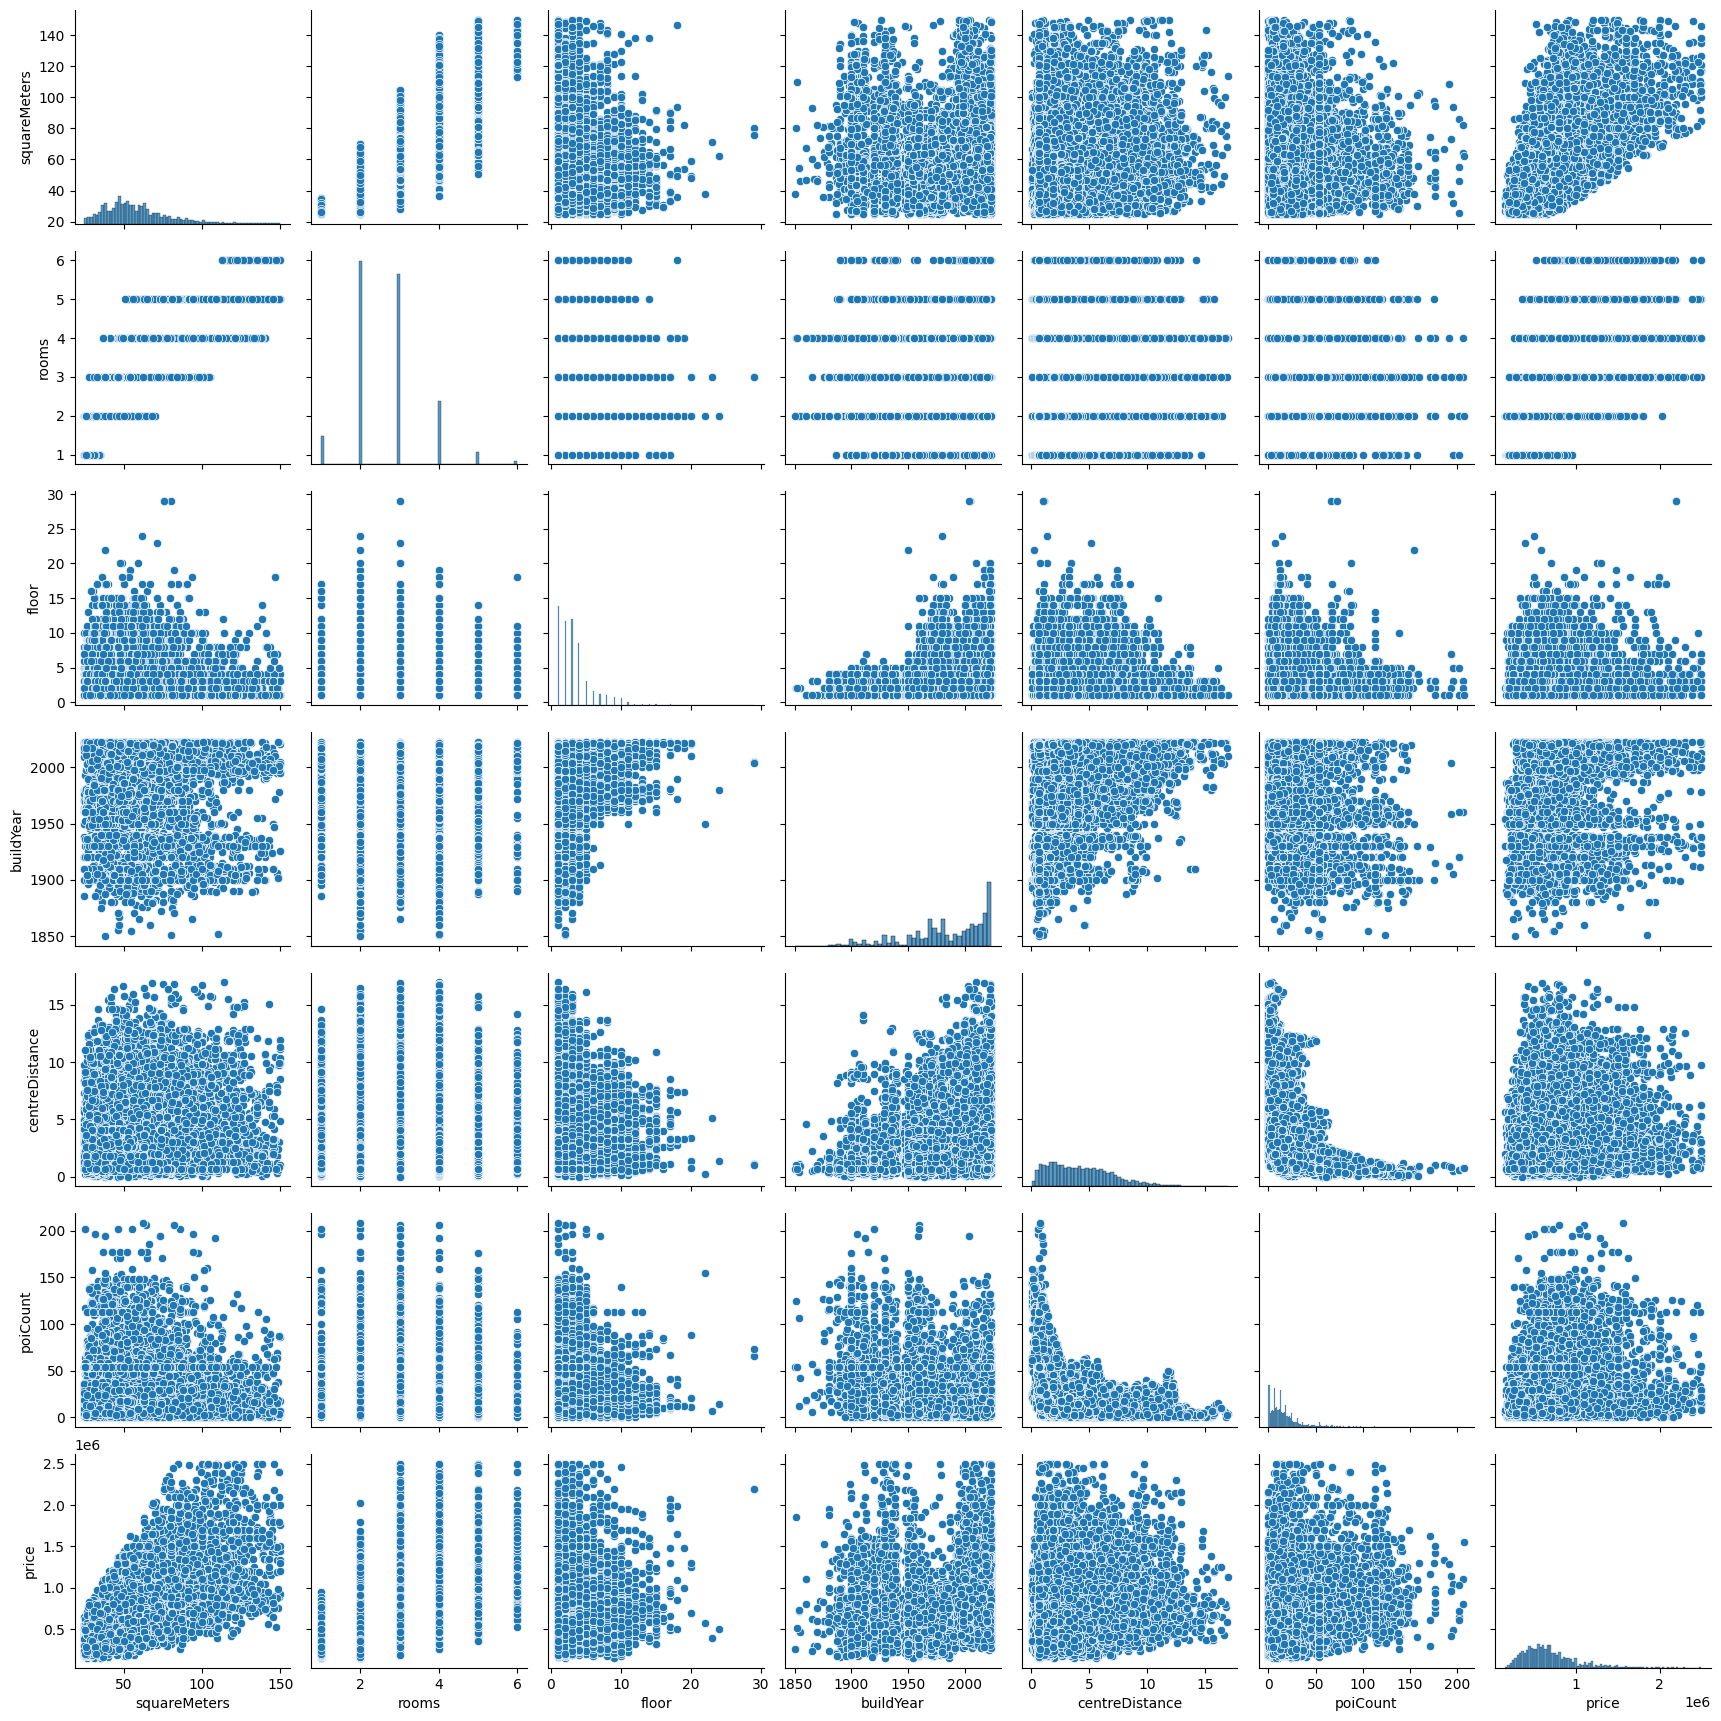

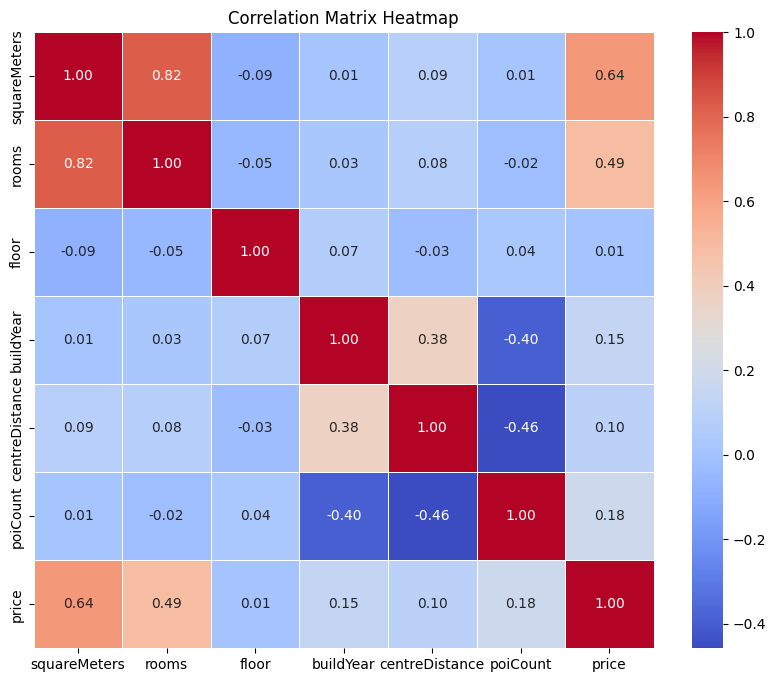

In [98]:
visualize_data_relationship(apt_data, features = ['squareMeters', 'rooms', 'floor', 'buildYear', 'centreDistance', 'poiCount', 'price'])

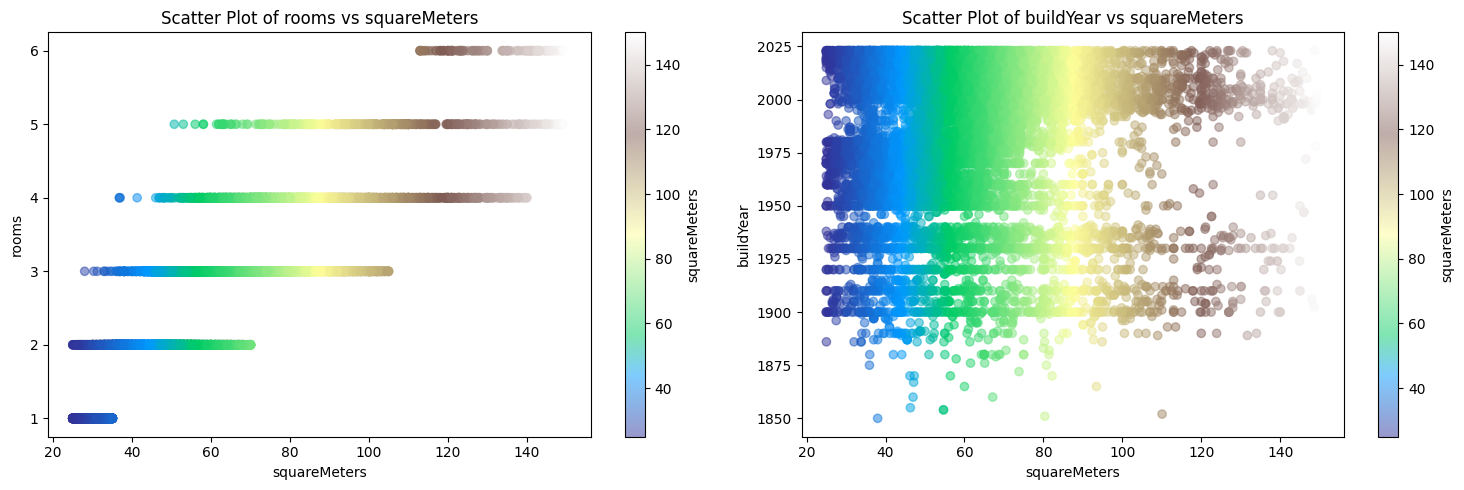

In [69]:
create_scatter_plots(apt_data, features=[('squareMeters', 'rooms'), ('squareMeters', 'buildYear')], n_rows=1, n_cols=2)

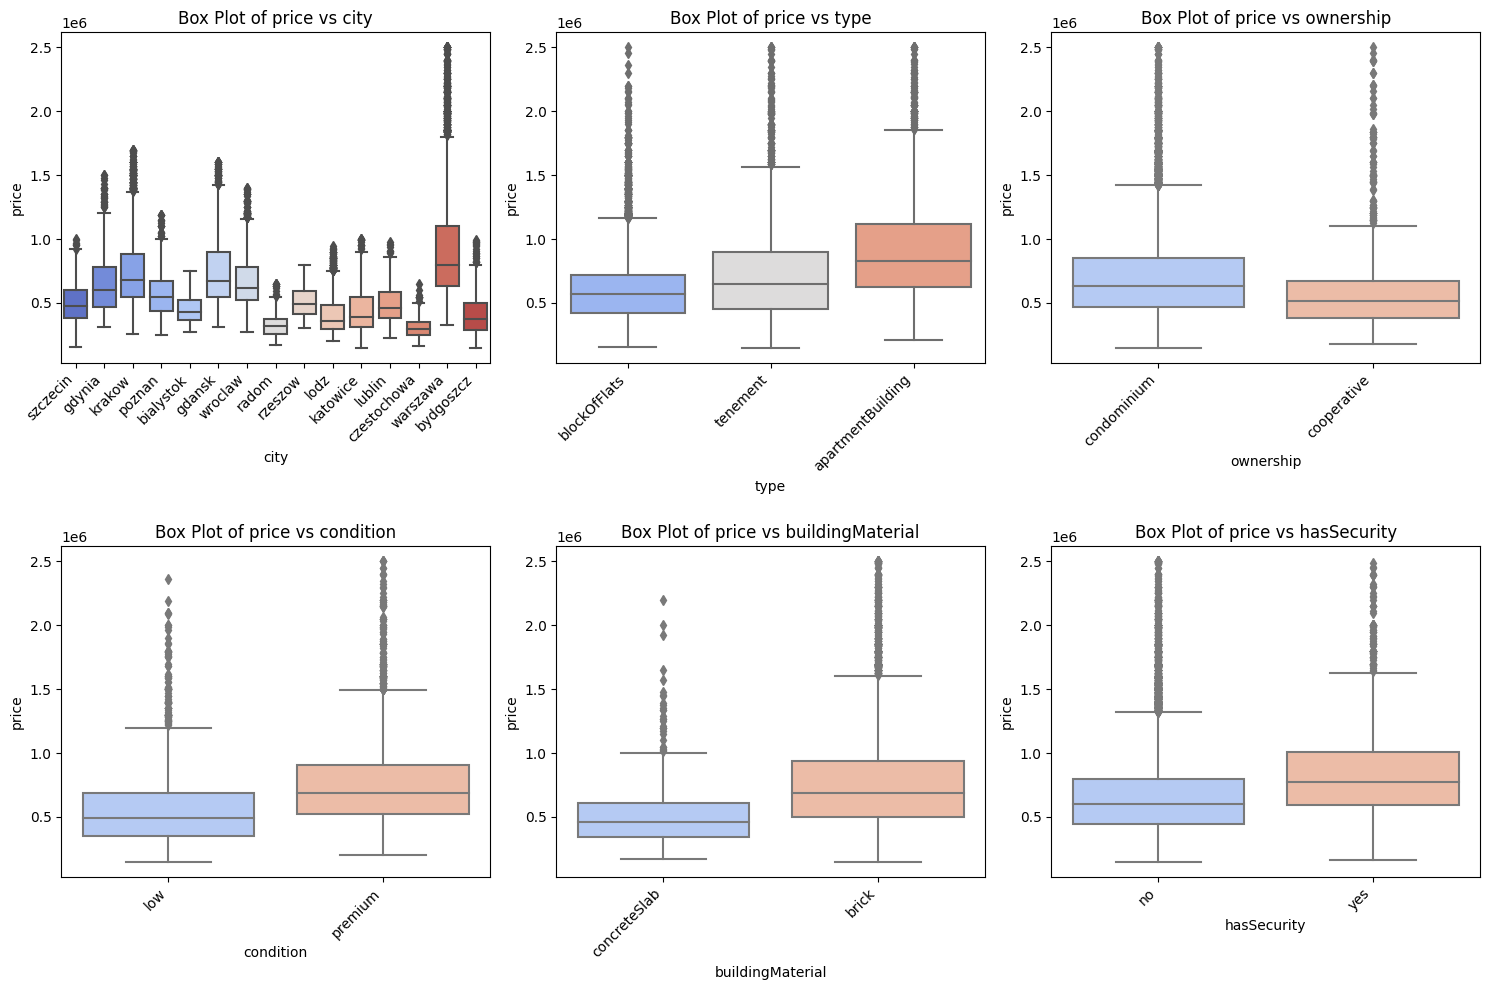

In [70]:
create_boxplots(apt_data, y_feature='price', x_features=['city', 'type', 'ownership', 'condition', 'buildingMaterial', 'hasSecurity'], n_rows=2, n_cols=3)

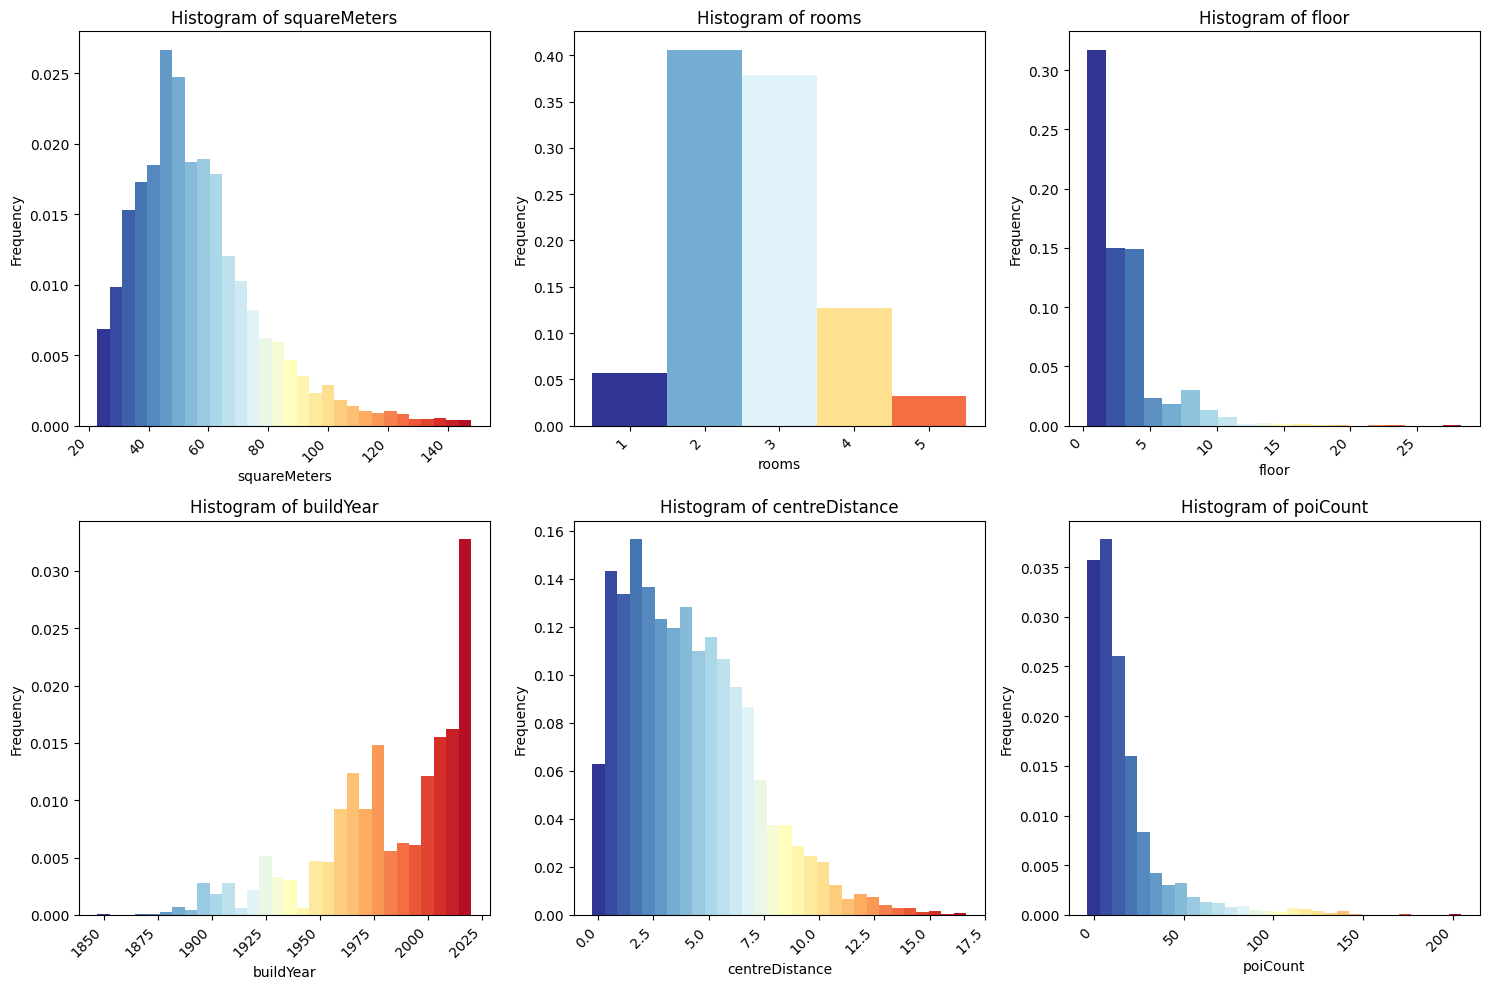

In [ ]:
create_histograms(apt_data, ['squareMeters', 'rooms', 'floor', 'buildYear', 'centreDistance', 'poiCount'], bins=[30,5,20,30,30,30], n_rows=2, n_cols=3)